# Знакомство с `torch.Tensor`

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы: 
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/docs/stable/torch.html


## Задачи для совместного разбора

1\. Создайте тензор и исследуйте его основные характеристики

In [13]:
import torch

basic = torch.randn(3, 4)
print("Tensor:\n", basic)
print("shape:", basic.shape)
print("dtype:", basic.dtype)
print("device:", basic.device)
print("numel:", basic.numel())
print("requires_grad:", basic.requires_grad)


Tensor:
 tensor([[ 0.1805,  0.5535, -1.0560,  1.1266],
        [-0.0902, -1.0423,  0.8323,  0.4297],
        [-2.9270, -0.4545,  0.1743,  0.5320]])
shape: torch.Size([3, 4])
dtype: torch.float32
device: cpu
numel: 12
requires_grad: False


2\. Создайте трехмерный тензор и рассмотрите основные способы индексирования по нему

In [14]:
cube = torch.arange(1, 25).reshape(2, 3, 4)
print("Весь тензор:\n", cube)
print("Срез первой глубины:\n", cube[0])
print("Срез 2-ого ряда на всей глубине):\n", cube[:, 1, :])
print("Элемент на глубине 1, ряде 2 и колонке", cube[1, 2, 3].item())


Весь тензор:
 tensor([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],

        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]])
Срез первой глубины:
 tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])
Срез 2-ого ряда на всей глубине):
 tensor([[ 5,  6,  7,  8],
        [17, 18, 19, 20]])
Элемент на глубине 1, ряде 2 и колонке 24


3\. Создайте тензор (4х4) и модифицируйте следующим образом: ко всем четным столбцам прибавьте 1, из нечетных вычтите 1.

In [15]:
matrix = torch.arange(1, 17,).reshape(4, 4)
even_cols = torch.arange(matrix.size(1)) % 2 == 1
odd_cols = ~even_cols
matrix[:, even_cols] += 1
matrix[:, odd_cols] -= 1

print(matrix)


tensor([[ 0,  3,  2,  5],
        [ 4,  7,  6,  9],
        [ 8, 11, 10, 13],
        [12, 15, 14, 17]])


4\. Обсудите совместимость `torch` с `numpy` и `sklearn`

In [16]:
try:
    from sklearn.preprocessing import StandardScaler
except ImportError:
    StandardScaler = None

data = torch.randn(5, 3)
np_view = data.numpy()

if StandardScaler is not None:
    scaler = StandardScaler()
    scaled = scaler.fit_transform(np_view)
    tensor_back = torch.from_numpy(scaled)
    print(tensor_back)
else:
    print("sklearn недоступен, но tensor.numpy() уже готов к использованию в sklearn API.")


tensor([[ 1.1475, -0.6997, -0.6013],
        [ 0.8308,  1.6965, -0.0109],
        [-0.5516,  0.1562,  1.3432],
        [ 0.2007, -1.2632,  0.7674],
        [-1.6274,  0.1102, -1.4984]])


- `torch.Tensor` и `numpy.ndarray` разделяют память при помощи `torch.from_numpy()` и метода `.numpy()`, что позволяет эффективно передавать данные без копирования.
- Большинство алгоритмов `sklearn` принимают входные данные в формате `numpy`, поэтому пайплайн обычно выглядит как: тензор → `.numpy()` → обучение/предсказание → обратно в тензор через `torch.from_numpy()`.
- При работе на GPU необходимо явно переместить тензор на CPU перед передачей в `numpy`/`sklearn`, поскольку эти библиотеки ожидают данные в памяти CPU.


## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Создайте двумерный тензор размера (100000, 10), заполненный нулями. Используя прихотливое индексирование, поставьте в каждой строке тензора ровно одну единицу в случайно выбранном столбце. Рассчитайте и выведите на экран вероятности $p_i$ того, что для случайно выбранной строки в столбце $i$ будет стоять единица.

- [ ] Проверено на семинаре

In [27]:
import torch

n_rows = 100000
n_cols = 10

t = torch.zeros((n_rows, n_cols))
rows = torch.arange(n_rows)
cols = torch.randint(0, n_cols, (n_rows,))

t[rows, cols] = 1
p = t.float().mean(dim=0)

print(p)


tensor([0.1000, 0.0993, 0.1018, 0.1002, 0.1008, 0.0989, 0.1003, 0.0997, 0.0998,
        0.0993])


<p class="task" id="2"></p>

2\. При помощи прихотливого индексирования для двумерного тензора размерности (10, 10), состоящего из случайных целых чисел в пределах от 0 до 10, получите тензор элементов, находящихся сразу над  побочной диагональю.

- [ ] Проверено на семинаре

In [29]:
n = 10

t2 = torch.randint(0, 11, (n, n))
rows = torch.arange(n)
cols = n - 1 - rows

above_secondary = t2[rows, cols]

print(t2)
print(above_secondary)


tensor([[ 9,  8,  6,  2,  2,  8,  1,  3, 10,  0],
        [10,  1,  2,  9,  5,  6,  8,  5,  0,  4],
        [ 0, 10,  3, 10,  2,  2,  2,  6,  4,  8],
        [ 1,  5,  5,  7,  8,  4,  2,  2,  7, 10],
        [ 7, 10,  5,  2,  9, 10,  6,  1,  9,  4],
        [ 1,  0,  8,  2,  2,  9,  5,  8,  7,  2],
        [ 4, 10,  2,  5,  1,  8, 10,  7,  9,  0],
        [ 5,  4,  2,  6,  6,  3,  8,  5,  0,  9],
        [ 3, 10, 10,  7,  8,  8,  3,  5,  4,  6],
        [ 7,  4,  5,  2,  8,  6,  6,  3,  6,  7]])
tensor([ 0,  0,  6,  2, 10,  2,  5,  2, 10,  7])


<p class="task" id="3"></p>

3\. Создайте двумерный тензор $t$ размерности (5, 5), состоящий из случайных чисел в пределах от 0 до 100. Обнулить все значения в массиве, расположенные вне квадрата размера 3х3 вокруг максимального элемента. Если максимумов несколько, обнулите элементы около любого из них.

- [ ] Проверено на семинаре

In [38]:
t3 = torch.randint(0, 101, (5, 5))

flat_idx = torch.argmax(t3)
row = (flat_idx // t3.size(1)).item()
col = (flat_idx % t3.size(1)).item()

mask = torch.zeros_like(t3, dtype=torch.bool)
r0 = max(0, row - 1)
r1 = min(t3.size(0), row + 2)
c0 = max(0, col - 1)
c1 = min(t3.size(1), col + 2)

mask[r0:r1, c0:c1] = True

t3_masked = t3.clone()
t3_masked[~mask] = 0

print(t3)
print(t3_masked)


tensor([[58, 92, 28, 75, 56],
        [48, 94, 24, 78, 55],
        [68, 45, 71, 17, 43],
        [51, 45, 14, 40,  6],
        [77, 25, 19, 57, 78]])
tensor([[58, 92, 28,  0,  0],
        [48, 94, 24,  0,  0],
        [68, 45, 71,  0,  0],
        [ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0]])


<p class="task" id="4"></p>

4\. Создайте трехмерный массив размерности (2, 5, 5) на основе решения задачи 3 (объедините исходный и результирущий тензор вдоль нулевой оси). Сохраните полученный трехмерный тензор в файл `tensor.pt`. Загрузите полученный тензор и покажите, что все элементы двух тензоров совпадают.

- [ ] Проверено на семинаре

In [20]:
t4 = torch.stack([t3, t3_masked], dim=0)

file_path = "tensor.pt"
torch.save(t4, file_path)
loaded = torch.load(file_path)

print(torch.equal(t4, loaded))


True


<p class="task" id="5"></p>

5\. Создайте четырехмерный массив `t` размерности (2, 3, 5, 5), заполненный случайными целыми числами от 1 до 10 (сами значения должны быть представлены типом float32). Рассчитайте среднее значение для каждого двумерного тензора `t[i, j, :, :]`. Представьте результат в виде трехмерного тензора размера (2, 3, 1).

- [ ] Проверено на семинаре

In [21]:
t5 = torch.randint(1, 11, (2, 3, 5, 5), dtype=torch.float32)
means = t5.mean(dim=(2, 3)).unsqueeze(-1)

print(t5)
print(means)


tensor([[[[ 3.,  8.,  9.,  1., 10.],
          [ 6.,  9.,  9.,  9.,  9.],
          [ 6.,  3.,  5.,  9.,  1.],
          [ 9.,  9.,  8.,  5.,  3.],
          [ 5.,  7.,  3., 10., 10.]],

         [[ 4.,  6.,  4.,  7.,  6.],
          [10.,  8.,  5.,  9., 10.],
          [ 1.,  1.,  3.,  3.,  2.],
          [ 3.,  9.,  7., 10.,  6.],
          [ 1.,  7., 10.,  6.,  4.]],

         [[ 1.,  1.,  8.,  5.,  9.],
          [ 9.,  4.,  9.,  5.,  6.],
          [ 7.,  8.,  9., 10., 10.],
          [ 4.,  2.,  8.,  9.,  5.],
          [ 8.,  6.,  3.,  6.,  9.]]],


        [[[ 3.,  3.,  8., 10.,  9.],
          [10.,  2.,  8.,  7.,  9.],
          [ 5.,  9.,  9.,  7.,  4.],
          [ 3.,  3.,  2.,  8., 10.],
          [ 9.,  9.,  1.,  4.,  7.]],

         [[ 2.,  3.,  4.,  2.,  7.],
          [ 2.,  8.,  4.,  2., 10.],
          [ 7.,  5.,  6.,  3.,  8.],
          [ 1.,  7.,  8.,  6.,  7.],
          [ 6.,  9.,  6.,  8.,  9.]],

         [[ 6., 10.,  2.,  4.,  1.],
          [ 1.,  7.,  4., 

<p class="task" id="6"></p>

6\. Создайте одномерный тензор размера `N=100_000_000`, заполненный числами из экспоненциального распредления с параметром $\lambda=5$. Рассчитайте значения для построения гистограммы при помощи пакета `torch`. Визуализируйте гистограмму. Проверьте возможность использования GPU. При наличии GPU перенесите созданный тензор в память GPU, повторите вычисления. Сравните время расчетом с и без использования GPU.

- [ ] Проверено на семинаре

CPU time: 3.52s


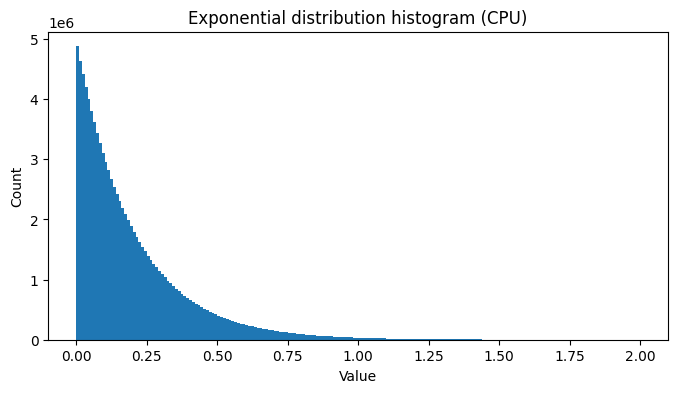

CUDA is not available on this machine.


In [22]:
import time
import matplotlib.pyplot as plt

N = 100_000_000
LAMBDA = 5.0
BINS = 200
RANGE = (0.0, 2.0)

def sample_and_hist(device):
    start = time.perf_counter()
    data = torch.empty(N, device=device).exponential_(lambd=LAMBDA)
    counts, bin_edges = torch.histogram(data, bins=BINS, range=RANGE)
    elapsed = time.perf_counter() - start
    return counts.cpu(), bin_edges.cpu(), elapsed

cpu_counts, cpu_edges, cpu_time = sample_and_hist(torch.device("cpu"))
print(f"CPU time: {cpu_time:.2f}s")

bin_width = (cpu_edges[1] - cpu_edges[0]).item()
plt.figure(figsize=(8, 4))
plt.bar(cpu_edges[:-1].numpy(), cpu_counts.numpy(), width=bin_width, align="edge")
plt.title("Exponential distribution histogram (CPU)")
plt.xlabel("Value")
plt.ylabel("Count")
plt.show()

if torch.cuda.is_available():
    gpu_counts, gpu_edges, gpu_time = sample_and_hist(torch.device("cuda"))
    print(f"GPU time: {gpu_time:.2f}s")
else:
    print("CUDA is not available on this machine.")


<p class="task" id="7"></p>

7\. Создайте четырехмерный тензор размера (10, 6, 6, 3), заполненный случайными целыми числами от 0 до 255. Считая, что данный тензор представляет собой батч из 10 картинок размера 6х6 в формате RGB, измените тензор следующим образом. Для оттенков красного обнулите все столбцы, кроме первых двух; для оттенков зеленого обнулите третий и четвертый столбцы; для оттенков синего обнулите пятый и шестой столбцы. Для выполнения задания используйте механизм распространения.

- [ ] Проверено на семинаре

In [23]:
images = torch.randint(0, 256, (10, 6, 6, 3), dtype=torch.int32)

cols = torch.arange(images.size(2)).view(1, 1, -1, 1)
mask = torch.ones((1, 1, images.size(2), images.size(3)), dtype=torch.int32)
mask[..., 0] = (cols < 2).int()
mask[..., 1] = ((cols != 2) & (cols != 3)).int()
mask[..., 2] = (cols < 4).int()

processed_images = images * mask

print(processed_images.shape)


RuntimeError: The expanded size of the tensor (1) must match the existing size (6) at non-singleton dimension 1.  Target sizes: [1, 1, 6].  Tensor sizes: [6, 1]